<a href="https://colab.research.google.com/github/oriyash88/CarsModelClassification/blob/main/CNN_End_To_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.utils import load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense ,Dropout, Flatten ,Conv2D,MaxPooling2D,MaxPool2D,Activation,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.preprocessing import image
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1DS_5kLbzYYzMWtp1WP3x_hxtRBhroJID

# images
!gdown --id 18dq8UZ-gORi67tPrxDo5QJ0pvaA3OfQE
!gdown --id 1ZTKaxKlSgvnZQt96zXkrIwRSNdKkpvdu
!gdown --id 1Jf50yZzhMSf-CYipunto6XU0lBy_nnib
#The model
!gdown --id 13-JKfut2nyXhedtFHrt2_rYLrCi6OZXO


### Download Data

train set contains 8041 examples
Test set contains 8144 examples

split and load the data

Now: 

1.   12144 train_set
2.   4041  test_set
3.   3000  validition_set


In [ ]:
cars_train,cars_test, cars_validation = tfds.load('Cars196', split=['train + test[:4000]', 'test[4000:]', 'train[1000:4000]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/cars196/2.1.0.incompleteEPUYVS/cars196-train.tfrecord*...:   0%|          …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cars196/2.1.0.incompleteEPUYVS/cars196-test.tfrecord*...:   0%|          |…

Dataset cars196 downloaded and prepared to /root/tensorflow_datasets/cars196/2.1.0. Subsequent calls will reuse this data.


In [ ]:
cars_train = cars_train.map(lambda x: (x['image'], x['label']))
cars_test = cars_test.map(lambda x: (x['image'], x['label']))
cars_validation = cars_validation.map(lambda x: (x['image'], x['label']))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
y_true = np.concatenate([y[np.newaxis] for x, y in cars_test], axis=0)
print(y_true)

[ 37 153 110 ... 118 113 121]


In [ ]:
print(len(cars_train))
print(len(cars_test))
print(len(cars_validation))

12144
4041
3000


Dictionary of the labels - maps between the label (int) number and the vehicle model (str)

In [ ]:
label_dic = pd.read_csv('/content/labels_dic.csv', header=None, dtype={0: str}).set_index(0).squeeze().to_dict()

###Resize all images to uniform size and cast to float

In [ ]:
def preprocess(image, label, target_size=(224, 224)):
    image = tf.image.resize(image, target_size) 
    image = tf.image.random_flip_left_right(image)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

batch_size = 32

cars_train = cars_train.map(preprocess).batch(batch_size)
cars_validation = cars_validation.map(preprocess).batch(batch_size)
cars_test = cars_test.map(preprocess).batch(batch_size)

#EXֹ_1

In [ ]:
model_1 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(196, activation='softmax')])

In [ ]:
model_1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(cars_train ,validation_data= cars_validation,batch_size=32, epochs=5)

Epoch 1/5
380/380 [==============================] - 43s 85ms/step - loss: 5.3139 - accuracy: 0.0096 - val_loss: 5.0899 - val_accuracy: 0.0210
Epoch 2/5
380/380 [==============================] - 32s 85ms/step - loss: 5.0839 - accuracy: 0.0200 - val_loss: 4.9123 - val_accuracy: 0.0600
Epoch 3/5
380/380 [==============================] - 32s 84ms/step - loss: 4.6430 - accuracy: 0.0875 - val_loss: 4.1025 - val_accuracy: 0.2443
Epoch 4/5
380/380 [==============================] - 33s 87ms/step - loss: 3.3166 - accuracy: 0.3666 - val_loss: 2.4962 - val_accuracy: 0.5430
Epoch 5/5
380/380 [==============================] - 34s 88ms/step - loss: 2.0612 - accuracy: 0.6167 - val_loss: 1.8574 - val_accuracy: 0.6283


###EX_1 - Model performance

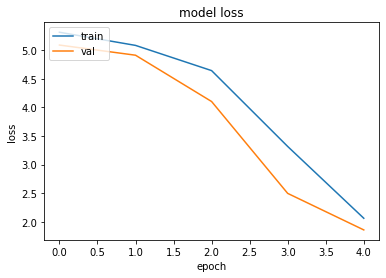

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

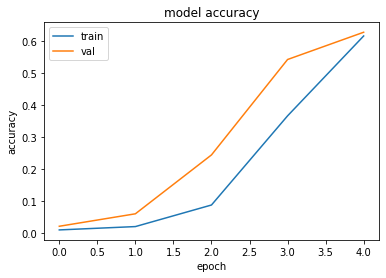

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
accuracy = round(history_1.history['val_accuracy'][-1], 2)
print(f'The model accuracy is: {int(accuracy*100)}'+ '%')

The model accuracy is: 63%


In [ ]:
for key, val in history_1.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 2.06
accuracy : 0.62
val_loss : 1.86
val_accuracy : 0.63


In [ ]:
print(y_true)

[ 37 153 110 ... 118 113 121]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict classes for the test dataset
y_pred = model_1.predict(cars_test).argmax(axis=1)
print(y_pred)

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')

127/127 [==============================] - 8s 64ms/step
[184 105  61 ... 168 147 112]
Precision: 0.04
Recall: 0.03
F1 score: 0.03


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#EXֹ_2

In [ ]:
model_2 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(196, activation='softmax')])

In [ ]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_2 = model_2.fit(cars_train ,validation_data= cars_validation,batch_size=32, epochs=10)

Epoch 1/10
380/380 [==============================] - 37s 87ms/step - loss: 5.0936 - accuracy: 0.0137 - val_loss: 5.0726 - val_accuracy: 0.0160
Epoch 2/10
380/380 [==============================] - 33s 87ms/step - loss: 5.0746 - accuracy: 0.0133 - val_loss: 5.0372 - val_accuracy: 0.0183
Epoch 3/10
380/380 [==============================] - 33s 86ms/step - loss: 5.0060 - accuracy: 0.0178 - val_loss: 4.9428 - val_accuracy: 0.0220
Epoch 4/10
380/380 [==============================] - 33s 86ms/step - loss: 4.9043 - accuracy: 0.0233 - val_loss: 4.8336 - val_accuracy: 0.0323
Epoch 5/10
380/380 [==============================] - 33s 87ms/step - loss: 4.7582 - accuracy: 0.0352 - val_loss: 4.6448 - val_accuracy: 0.0520
Epoch 6/10
380/380 [==============================] - 33s 87ms/step - loss: 4.5277 - accuracy: 0.0633 - val_loss: 4.4140 - val_accuracy: 0.0850
Epoch 7/10
380/380 [==============================] - 33s 88ms/step - loss: 4.2069 - accuracy: 0.1096 - val_loss: 4.0595 - val_accuracy:

###EX_2 - Model performance

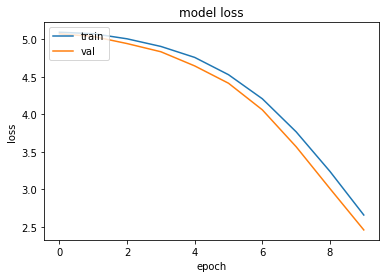

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

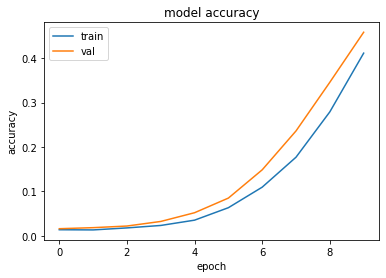

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
accuracy = round(history_2.history['val_accuracy'][-1], 2)
print(f'The model accuracy is: {int(accuracy*100)}'+ '%')

The model accuracy is: 46%


In [ ]:
for key, val in history_2.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 2.66
accuracy : 0.41
val_loss : 2.46
val_accuracy : 0.46


In [ ]:
print(y_true)

[ 37 153 110 ... 118 113 121]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict classes for the test dataset
y_pred = model_2.predict(cars_test).argmax(axis=1)
print(y_pred)

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')

127/127 [==============================] - 10s 76ms/step
[ 80 142  61 ...  87 113 118]
Precision: 0.08
Recall: 0.07
F1 score: 0.07


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#EXֹ_3

In [ ]:
model_3 = tf.keras.Sequential([
   Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(196, activation='softmax')])

In [ ]:
from keras import callbacks
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(cars_train ,validation_data= cars_validation,batch_size=32, epochs=20)

Epoch 1/20
380/380 [==============================] - 41s 95ms/step - loss: 5.3646 - accuracy: 0.0076 - val_loss: 5.4746 - val_accuracy: 0.0070
Epoch 2/20
380/380 [==============================] - 41s 108ms/step - loss: 5.1967 - accuracy: 0.0153 - val_loss: 5.0262 - val_accuracy: 0.0260
Epoch 3/20
380/380 [==============================] - 36s 95ms/step - loss: 5.0627 - accuracy: 0.0252 - val_loss: 4.8581 - val_accuracy: 0.0387
Epoch 4/20
380/380 [==============================] - 36s 95ms/step - loss: 4.9298 - accuracy: 0.0313 - val_loss: 4.7020 - val_accuracy: 0.0540
Epoch 5/20
380/380 [==============================] - 36s 95ms/step - loss: 4.7969 - accuracy: 0.0410 - val_loss: 4.5666 - val_accuracy: 0.0753
Epoch 6/20
380/380 [==============================] - 36s 96ms/step - loss: 4.6263 - accuracy: 0.0552 - val_loss: 4.2993 - val_accuracy: 0.0990
Epoch 7/20
380/380 [==============================] - 37s 96ms/step - loss: 4.4269 - accuracy: 0.0688 - val_loss: 4.0518 - val_accuracy

###EX_3 - Model performance

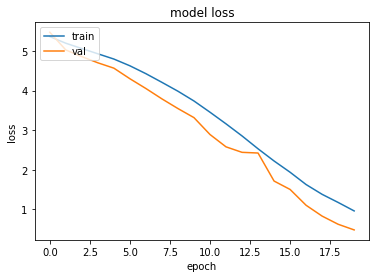

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

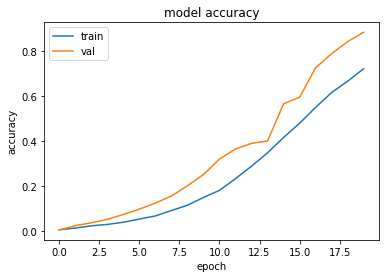

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
accuracy = round(history_3.history['val_accuracy'][-1], 2)
print(f'The model accuracy is: {int(accuracy*100)}'+ '%')

The model accuracy is: 88%


In [ ]:
for key, val in history_3.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 0.96
accuracy : 0.72
val_loss : 0.48
val_accuracy : 0.88


In [ ]:
print(y_true)
print(len(cars_test))

[ 37 153 110 ... 118 113 121]
127


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict classes for the test dataset
y_pred = model_3.predict(cars_test).argmax(axis=1)
print(y_pred)

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')

127/127 [==============================] - 9s 70ms/step
[162  93 115 ...  63 112  61]
Precision: 0.29
Recall: 0.26
F1 score: 0.25


##save the model

In [ ]:
#%%script echo skipping
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%%script echo skipping
model_3.save('/content/CNN_Model.h5')

##Test environment

To run this Test environment run "import" first in the top of this notebook

##upload the model

In [ ]:
best_model = tf.keras.models.load_model('/content/CNN_Model.h5')

In [ ]:
from google.colab import files
from numpy import load as load_npy
uploaded = files.upload()
image_path = '/content/' + list(uploaded.keys())[0]

Saving Ferrari.png to Ferrari (3).png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_image(img_path, show=False):
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224, 3))
    img_tensor = tf.keras.utils.img_to_array(img) 
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    img_tensor /= 255. 

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

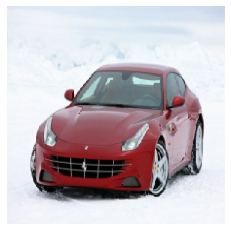

1/1 [==============================] - 0s 22ms/step
100
Ferrari FF Coupe 2012


In [ ]:
label_dic = pd.read_csv('/content/labels_dic.csv', header=None, dtype={0: str}).set_index(0).squeeze().to_dict()
img = prepare_image(image_path, show=True)

pred = best_model.predict(img)
class_id = np.argmax(pred)
print(class_id)
print(label_dic[str(pred.argmax())])